<a href="https://colab.research.google.com/github/samikshyasanskruti/MachineLearning-Practice-with-Python/blob/main/4_Predicting_Online_Ad_Click_Through_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SGD CLASSIFIER***

**Consider following as X_train and y_train**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
X_train=np.array([[6,7],[2,4],[3,6],[4,7],[1,6],[5,2],[2,0],[6,3],[4,1],[7,2]])
y_train=np.array([0,0,0,0,0,1,1,1,1,1])

**Create a logistic regression model.train and print coefficient ,intercept**

In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss='log_loss',max_iter=1000,alpha=0.01,penalty='l2')
model.fit(X_train,y_train)

print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

Coefficients: [[ 3.80738938 -4.17196813]]
Intercept: [1.1365765]


**Predict clss for test data for [[6,1],[1,3],[3,1],[4,5]]**

In [ ]:
X_test=np.array([[6,1],[1,3],[3,1],[4,5]])
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 0])

**Plot train and test data**

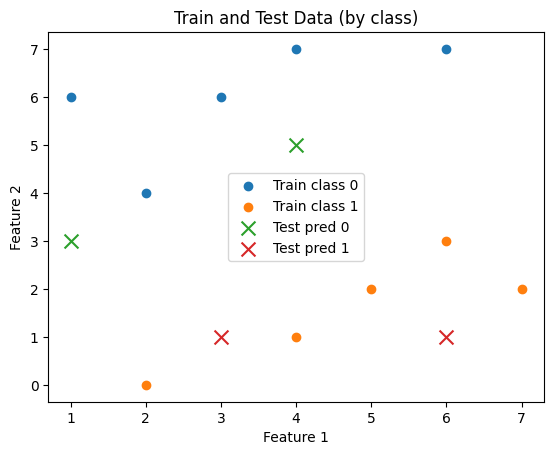

In [ ]:
import matplotlib.pyplot as plt

# Plot training data
plt.scatter(X_train[y_train==0][:,0],
            X_train[y_train==0][:,1],
            marker='o',
            label='Train class 0')

plt.scatter(X_train[y_train==1][:,0],
            X_train[y_train==1][:,1],
            marker='o',
            label='Train class 1')

# Plot test predictions
plt.scatter(X_test[y_pred==0][:,0],
            X_test[y_pred==0][:,1],
            marker='x',
            s=100,
            label='Test pred 0')

plt.scatter(X_test[y_pred==1][:,0],
            X_test[y_pred==1][:,1],
            marker='x',
            s=100,
            label='Test pred 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Train and Test Data (by class)")
plt.legend()
plt.show()

**Load train.csv, separate into X and Y, do necessary encoding, split into train and test
data [as previous**

In [ ]:
import pandas as pd
df=pd.read_csv(r'/content/train (1).csv')
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


**2.Target click**

In [ ]:
y=df[['click']]

**3. id,hour,device_id and device_ip do not contain much useful information.Drop these columns from the dataframe(including target column)**

In [ ]:
X = df.drop(columns=['click','id','hour','device_id','device_ip'],axis=1)


**4.Sample Size**

In [ ]:
print(X.shape,y.shape)

(300000, 19) (300000, 1)


**5.Split  into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(240000, 19) (60000, 19) (240000, 1) (60000, 1)


**6.Encode categorical data by OneHotEncoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')

**7. Fit and transform enc by train data**

In [ ]:
X_train_enc=enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)
print(X_train_enc[0])
print(X_train_enc[1])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19 stored elements and shape (1, 8163)>
  Coords	Values
  (0, 2)	1.0
  (0, 7)	1.0
  (0, 1353)	1.0
  (0, 2350)	1.0
  (0, 2645)	1.0
  (0, 3738)	1.0
  (0, 3854)	1.0
  (0, 3900)	1.0
  (0, 5685)	1.0
  (0, 7275)	1.0
  (0, 7278)	1.0
  (0, 7519)	1.0
  (0, 7784)	1.0
  (0, 7788)	1.0
  (0, 7864)	1.0
  (0, 7937)	1.0
  (0, 7942)	1.0
  (0, 7981)	1.0
  (0, 8161)	1.0
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19 stored elements and shape (1, 8163)>
  Coords	Values
  (0, 2)	1.0
  (0, 6)	1.0
  (0, 755)	1.0
  (0, 2333)	1.0
  (0, 2633)	1.0
  (0, 3538)	1.0
  (0, 3887)	1.0
  (0, 3902)	1.0
  (0, 5902)	1.0
  (0, 7275)	1.0
  (0, 7278)	1.0
  (0, 7739)	1.0
  (0, 7784)	1.0
  (0, 7788)	1.0
  (0, 7926)	1.0
  (0, 7940)	1.0
  (0, 7955)	1.0
  (0, 8058)	1.0
  (0, 8143)	1.0


**Create and train Logistic regression model, predict for test data**

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log_loss', max_iter=100, alpha=0.01, penalty='l2')
model.fit(X_train_enc, y_train.values.flatten())
y_pred = model.predict(X_test_enc)

**Calculate accuracy and roc auc score**

In [ ]:
from sklearn . metrics import accuracy_score , roc_auc_score
print (" Accuracy :", accuracy_score (y_test , y_pred ) )
print ("ROC AUC:", roc_auc_score (y_test , y_pred ) )


 Accuracy : 0.8292666666666667
ROC AUC: 0.50042760099461


**Get all features name.**

In [ ]:
feature_names = enc. get_feature_names_out ()


**Print 10 least important features**

In [ ]:
print ( feature_names [np. argsort (abs( model . coef_ ) ) [0][:10]])

['device_model_e62a356b' 'C20_100051' 'C14_21482' 'site_domain_750413f7'
 'device_model_9f2b3c8e' 'site_domain_b93564ec' 'site_id_098e18a3'
 'site_domain_0d343541' 'device_model_685b4cb3' 'app_category_7113d72a']


**Print top 10 most important features.**

In [ ]:
print ( feature_names [np. argsort (abs( model . coef_ ) ) [0][ -10 :]])

['C18_0' 'device_model_8a4875bd' 'banner_pos_0' 'C21_61'
 'site_domain_98572c79' 'C21_157' 'C18_2' 'site_id_d9750ee7' 'C15_320'
 'C16_50']


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np # np needs to be imported for np.unique

online_model = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='constant', eta0=0.01, penalty='l2')
classes = np.unique(y_train.values.flatten())
batch_size = 1000

for i in range(0, X_train_enc.shape[0], batch_size):
    X_batch = X_train_enc[i:i+batch_size]
    Y_batch = y_train.values.flatten()[i:i+batch_size]
    online_model.partial_fit(X_batch, Y_batch, classes=classes)

y_online_pred = online_model.predict(X_test_enc)
print("Online Learning Accuracy:", accuracy_score(y_test, y_online_pred))
print("Online Learning ROC AUC:", roc_auc_score(y_test, y_online_pred))

Online Learning Accuracy: 0.8309333333333333
Online Learning ROC AUC: 0.5100329013640679


# ***LOGISTIC REGRESSION***

**Generate 1000 samples with 3 class and 20 features using make classification module.**

In [ ]:
from sklearn . datasets import make_classification
X, y = make_classification ( n_samples =1000, n_features =20,n_informative =15, n_redundant =5, n_classes =3,random_state =42)
print (X.shape , y. shape )


(1000, 20) (1000,)


**Define multi-class Logistic regression model**

In [ ]:
from sklearn . linear_model import LogisticRegression
model = LogisticRegression ( multi_class ='multinomial',solver ='lbfgs', max_iter =500)


**Split the dataset into train and test, fit the model, and calculate accuracy, f1-score.**

In [ ]:
from sklearn . model_selection import train_test_split
from sklearn . metrics import accuracy_score , f1_score
X_train , X_test , y_train , y_test = train_test_split (X, y,test_size =0.2, random_state =42)
model .fit( X_train , y_train )
y_pred = model . predict ( X_test )
print (" Accuracy :", accuracy_score (y_test , y_pred ) )
print ("F1 Score :", f1_score (y_test , y_pred ,
average ='weighted') )


 Accuracy : 0.655
F1 Score : 0.6568916992505703
